![Name.png](Name.png)

# Pendeteksi Volume Air Secara Otomatis Menggunakan Fuzzy

Ketersediaan air di suatu gedung atau bangunan masih sulit untuk dipantau, karena cara yang digunakan masih mengandalkan manusia. Membantu dalam memdeteksi volume air secara efektif pada bak penampungan air menggunakan sensor ultrasonic hc-sr04 dan fuzzy logic. Ketersediaan air di suatu gedung atau bangunan dipantau saat air pada penampungan telah habis.Hal ini tidak baik karena ketersediaan air sangat perlu dan harus mencukupi kebutuhan gedung secara terus-menerus.Selama ini, pemantauan volume penampungan air dilakukan secara visual.Seseorang hanya melihat isi penampungan air tersebut dari bagian atas saja, sehingga informasi yang didapat tidak akurat.Selain itu, wadah penampungan umumnya tidak tembus pandang.Sehingga sulit untuk dilakukan pemantauan volume tanki air. Pada perancangan alat ini system mampu bekerja secara akurat dengan input tinggi air dan keluaran air kran menggunakan sensor water flow serta pengujian dapat menentukan tingkat pengisian yang dilihat dari rule-rule yang dirancang.Hasil dari pendeteksian sensor ultrasonic terdapat tiga tanda led indicator,led biru menandakan bahwa volume air didalam water tank sudah penuh,led kuning membertahu bahwa water tank sebagian terisi dan led warna merah memberitahukan bahwa volume air didalam water tank sudah habis dan segera diisi kembali. Dari hasil pengujian ini,dapat diambil kesimpulan dalam penentuan status tingkat.

### Input
Tinggi Air
 - **Sedikit:** 1 - 11 cm
 - **Setengah:** 6 - 16 cm
 - **Penuh:** 11 - 22 cm
 
Air Kran
 - **Sedikit:** 1 - 50 ml
 - **Sedang:** 30 - 70 ml
 - **Normal:** 50 - 100 ml
 
### Output
Tingkat Pengisian Air
 - **Lambat:** 1 - 100 m/s
 - **Normal:** 60 - 140 m/s
 - **Cepat:** 100 - 200 m/s
 
Selanjutnya, akan diterjemahkan menggunakan program sebagai berikut:

### Mengimpor library untuk fuzzy
Beberapa library yang digunakan itu adalah _matplotlib.pyplot_ , _numpy_ dan _skfuzzy_. Kita juga mengambil fungsi _control_ dari library _skfuzzy_.

In [10]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl


# Fuzzyfikasi
Fuzzyfikasi adalah proses untuk mengubah nilai crisp yang diterima menjadi nilai fuzzy (memiliki nilai diantara 0 dan 1). Hal ini dapat dilakukan dengan memasukkan nilai crisp kedalam himpunan fuzzy yang memiliki beberapa kondisi dengan derajat keanggotaannya masing masing.


### Menentukan variabel dan semesta pembicaraan

Pada langkah ini, setiap variabel input dan output akan ditentukan nilai semesta pembicaraannya atau penentuan batas nilai dari masing-masing variabel. Karena setiap variabel yang akan digunakan oleh proses fuzzy akan memiliki nilai numerik, dan memiliki batas awal dan batas akhir (crisp).

In [11]:
tinggi = ctrl.Antecedent(np.arange(1, 22, 1), 'tinggi air')
kran = ctrl.Antecedent(np.arange(1, 100, 1), 'air kran')
kecepatan = ctrl.Consequent(np.arange(1, 200, 1), 'tingkat pengisian')

# Untuk Plot Terpisah
tinggi1 = np.arange(1, 22, 1)
kran1 = np.arange(1, 100, 1)
kecepatan1 = np.arange(1, 200, 1)

Penggunaan `antecedent` adalah premis atau sebagai inputnya, dan `consequent` sebagai kesimpulan atau outputnya. Dan angka-angka di dalam kurung tersebut adalah batas-batasnya yang formatnya adalah _**(batas awal, batas akhir, kelipatan)**_. Lalu diberikan label dengan nama variabelnya.

### Menentukan Himpunan Fuzzy
Selanjutnya, ketika sudah menentukan semesta pembicaraan atau crisp dari masing-masing variabel dalam bentuk numerik, dilanjutkan dengan membuat himpunan fuzzy yang direpresentasikan dalam variabel linguistik. Setiap variabel linguistik tersebut akan memiliki domain atau range dari minimal ke maksimal. Berikut dibentuk dalam tabel:
![fz1.png](fz1.png)

### Penentuan Fungsi Keanggotaan

Dalam module Skfuzzy, terdapat fungsi untuk memetakan bahasa linguistik dalam himpunan fuzzy kedalam angka. Fungsi yang dipakai adalah fuzz.trapmf() dan fuzz.trimf().

* fuzz.trapmf( universe, [ titik_awal, titik_kiri, titik_kanan, titik_akhir ) : Digunakan untuk merepresentasikan fungsi keanggotaan dengan kurva trapesium. Fungsi ini memiliki parameter universe dan menerima 4 titik untuk membentuk domain trapesium.
* fuzz.trimf( universe, [ titik_awal, titik_tengah, titik_akhir ) : Berfungsi untuk menggambarkan fungsi keanggotaan dengan kurva segitiga siku. Fungsi ini memiliki parameter universe dan menerima 3 titik untuk membentuk domain segitiga siku.

# Fuzzifikasi Tinggi Air 

Proses untuk mengubah variabel non numerik menjadi variabel non fuzzy (numerik) menjadi variabel fuzzy (linguistik)

Untuk tinggi,\ air, fungsi keanggotaan dibagi menjadi 3 bagian :
$$ tinggi $$
$$ sedikit = 1 - 1 $$
$$ setengah  = 6 - 16 $$
$$ penuh = 11 - 22 $$




Dengan fungsi keanggotaan:

\begin{equation}
  tinggi['sedikit'] = \mu tinggi(x)=\begin{cases}
    1, & \text{$1 \leq x \leq 5$}.\\
    (11 - x)/(11 - 5) , & \text{$5 \leq x \leq 11$}.\\
    0, & \text{$x\geq 11$}.
  \end{cases}
  \\
  tinggi['setengah'] = \mu tinggi(x)=\begin{cases}
    0, & \text{$x \leq 6$ atau $x\geq 16$}.\\
    (x - 6)/(10 - 6) , & \text{$6 \leq x \leq 10$}.\\
    (16 - x)/(16 - 10) , & \text{$10 \leq x \leq 16$}.\\
  \end{cases}
  \\
     tinggi['banyak'] = \mu tinggi(x)=\begin{cases}
    0, & \text{$x\leq 11$}.\\
    (x - n)/(20 - 20) , & \text{$11 \leq x \leq 20$}.\\
    1, & \text{$x\geq 20$}.
  \end{cases}
\end{equation}


#### Fungsi Keanggotaan Variabel Tinggi Air

In [12]:
tinggi['sedikit'] = fuzz.trapmf(tinggi.universe, [1, 1, 5, 11])
tinggi['setengah'] = fuzz.trimf(tinggi.universe, [6, 11, 16])
tinggi['penuh'] = fuzz.trapmf(tinggi.universe, [11, 20, 22, 22])

#Untuk plot terpisah
tinggi1_sedikit = fuzz.trapmf(tinggi1, [1, 1, 5, 11])
tinggi1_setengah = fuzz.trimf(tinggi1, [6, 11, 16])
tinggi1_penuh= fuzz.trapmf(tinggi1, [11, 20, 22, 22])


# Fuzzifikasi Air Kran 

Untuk air kran, fungsi keanggotaan dibagi menjadi 3 bagian :
$$ kran $$
$$ sedikit = 1 - 50 $$
$$ sedang = 30 - 70 $$
$$ banyak = 50 - 100 $$




Dengan fungsi keanggotaan:

\begin{equation}
  kran['sedikit'] = \mu kran(x)=\begin{cases}
     1, & \text{$1 \leq x \leq 10$}.\\
    (50 - x)/(50 - 10) , & \text{$10 \leq x \leq 50$}.\\
    0, & \text{$x\geq 50$}.
  \end{cases}
  \\
  kran['sedang'] = \mu kran(x)=\begin{cases}
     0, & \text{$x \leq 30$ atau $x\geq 70$}.\\
    (x - 30)/(50 - 30) , & \text{$30 \leq x \leq 50$}.\\
    (70 - x)/(70 - 50) , & \text{$50 \leq x \leq 70$}.\\
  \end{cases}
  \\
     kran['banyak'] = \mu kran(x)=\begin{cases}
    0, & \text{$x\leq 50$}.\\
    (x - 50)/(85 - 50) , & \text{$50 \leq x \leq 85$}.\\
    1, & \text{$x\geq 85$}.
  \end{cases}
\end{equation}


#### Fungsi Keanggotaan Variabel Air Kran

In [13]:
kran['sedikit'] = fuzz.trapmf(kran.universe, [1, 1, 10, 50])
kran['sedang'] = fuzz.trimf(kran.universe, [30, 50, 70])
kran['banyak'] = fuzz.trapmf(kran.universe, [50, 85, 100, 100])

#Untuk plot terpisah
kran1_sedikit = fuzz.trapmf(kran1, [1, 1, 10, 50])
kran1_sedang = fuzz.trimf(kran1, [30, 50, 70])
kran1_banyak= fuzz.trapmf(kran1, [50, 85, 100, 100])

# Fuzzifikasi Pengisian Air
Untuk pengisian air, fungsi keanggotaan dibagi menjadi 3 bagian :
$$ kecepatan $$
$$ lambat = 1 - 100 $$
$$ normal = 60 - 140 $$
$$ cepat = 100 - 200 $$


Dengan fungsi keanggotaan:

\begin{equation}
  kecepatan['lambat'] = \mu kecepatan(x)=\begin{cases}
     0, & \text{$x\geq 100$}.\\
    (100 - x)/(100 - 20) , & \text{$20 \leq x \leq 100$}.\\
    1, & \text{$1 \leq x \leq 20$}.
  \end{cases}
  \\
  kecepatan['normal'] = \mu kecepatan(x)=\begin{cases}
    0, & \text{$x \leq 60$ atau $x\geq 140$}.\\
    (x - 60)/(100 - 60) , & \text{$60 \leq x \leq 100$}.\\
    (140 - x)/(140 - 100) , & \text{$100 \leq x \leq 140$}.\\
  \end{cases}
  \\
     kecepatan['cepat'] = \mu kecepatan(x)=\begin{cases}
    0, & \text{$x \leq 100$}.\\
    (x - 100)/(175 - 100) , & \text{$100 \leq x \leq 175$}.\\
    1, & \text{$x\geq 175$}.
  \end{cases}
\end{equation}


#### Fungsi Keanggotaan Variabel Tingkat Pengisian Air

In [14]:
kecepatan['lambat'] = fuzz.trapmf(kecepatan.universe, [1, 1, 20, 100])
kecepatan['normal'] = fuzz.trimf(kecepatan.universe, [60, 100, 140])
kecepatan['cepat'] = fuzz.trapmf(kecepatan.universe, [100, 175, 200, 200])

#Untuk plot terpisah
kecepatan1_lambat = fuzz.trapmf(kecepatan1, [1, 1, 20, 100])
kecepatan1_normal = fuzz.trimf(kecepatan1, [60, 100, 140])
kecepatan1_cepat= fuzz.trapmf(kecepatan1, [100, 175, 200, 200])

### Menampilkan Grafik Masing-Masing Himpunan Fuzzy

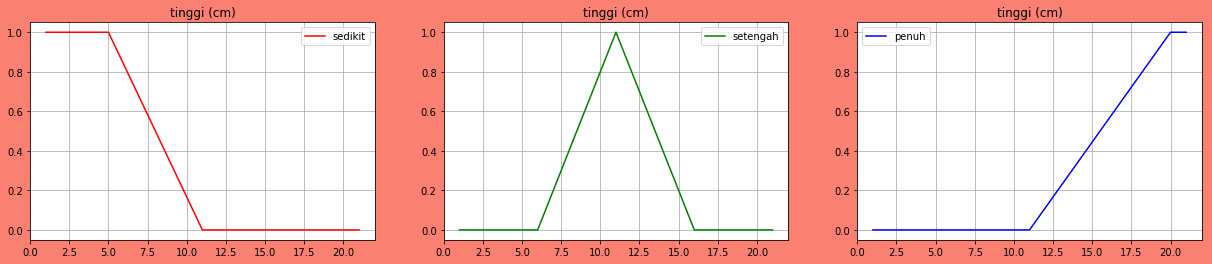

In [15]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, facecolor='salmon', figsize=(21, 4))

ax0.plot(tinggi1,tinggi1_sedikit, 'red', linewidth=1.5, label='sedikit')
ax1.plot(tinggi1,tinggi1_setengah, 'green', linewidth=1.5, label='setengah')
ax2.plot(tinggi1,tinggi1_penuh, 'blue', linewidth=1.5, label='penuh')

ax0.set_title('tinggi (cm)')
ax1.set_title('tinggi (cm)')
ax2.set_title('tinggi (cm)')

ax0.grid()
ax1.grid()
ax2.grid()

ax0.legend()
ax1.legend()
ax2.legend()

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


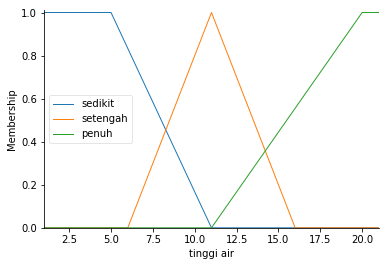

In [16]:
tinggi.view()

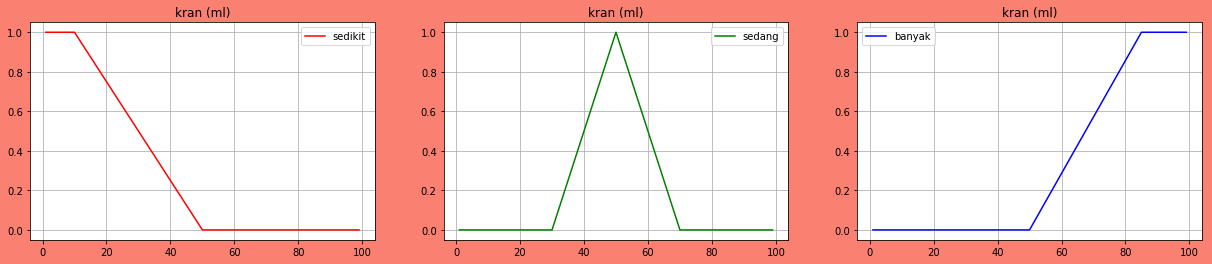

In [17]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, facecolor='salmon', figsize=(21, 4))

ax0.plot(kran1,kran1_sedikit, 'red', linewidth=1.5, label='sedikit')
ax1.plot(kran1,kran1_sedang, 'green', linewidth=1.5, label='sedang')
ax2.plot(kran1,kran1_banyak, 'blue', linewidth=1.5, label='banyak')

ax0.set_title('kran (ml)')
ax1.set_title('kran (ml)')
ax2.set_title('kran (ml)')

ax0.grid()
ax1.grid()
ax2.grid()

ax0.legend()
ax1.legend()
ax2.legend()

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


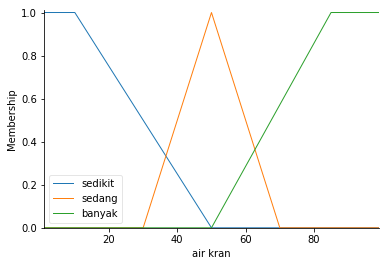

In [18]:
kran.view()

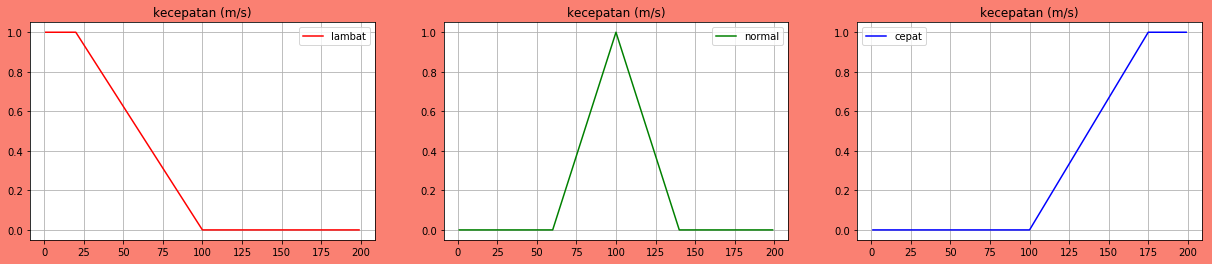

In [19]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, facecolor='salmon', figsize=(21, 4))

ax0.plot(kecepatan1,kecepatan1_lambat, 'red', linewidth=1.5, label='lambat')
ax1.plot(kecepatan1,kecepatan1_normal, 'green', linewidth=1.5, label='normal')
ax2.plot(kecepatan1,kecepatan1_cepat, 'blue', linewidth=1.5, label='cepat')

ax0.set_title('kecepatan (m/s)')
ax1.set_title('kecepatan (m/s)')
ax2.set_title('kecepatan (m/s)')

ax0.grid()
ax1.grid()
ax2.grid()

ax0.legend()
ax1.legend()
ax2.legend()


### Menampilkan Grafik Fungsi Keanggotaan

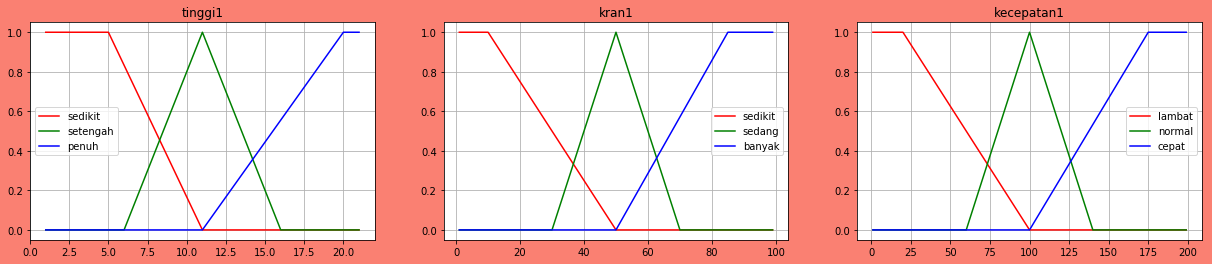

In [20]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, facecolor='salmon', figsize=(21, 4))

ax0.plot(tinggi1,tinggi1_sedikit, 'red', linewidth=1.5, label='sedikit')
ax0.plot(tinggi1,tinggi1_setengah, 'green', linewidth=1.5, label='setengah')
ax0.plot(tinggi1,tinggi1_penuh, 'blue', linewidth=1.5, label='penuh')

ax1.plot(kran1,kran1_sedikit, 'red', linewidth=1.5, label='sedikit')
ax1.plot(kran1,kran1_sedang, 'green', linewidth=1.5, label='sedang')
ax1.plot(kran1,kran1_banyak, 'blue', linewidth=1.5, label='banyak')

ax2.plot(kecepatan1,kecepatan1_lambat, 'red', linewidth=1.5, label='lambat')
ax2.plot(kecepatan1,kecepatan1_normal, 'green', linewidth=1.5, label='normal')
ax2.plot(kecepatan1,kecepatan1_cepat, 'blue', linewidth=1.5, label='cepat')

ax0.set_title('tinggi1')
ax1.set_title('kran1')
ax2.set_title('kecepatan1')

ax0.grid()
ax1.grid()
ax2.grid()

ax0.legend()
ax1.legend()
ax2.legend()

# Inferencing
Pada tahap inferencing, membuat aturan-aturan fuzzy yang dinyatakan dalam bentuk IF .... THEN ....
* Pada sistem ini berdasarkan jumlah fuzzifikasi dari variabel suhu yang berjumlah 3 dan fuzzifikasi dari variabel kelembaban yang berjumlah 3, maka rule yang dibuat berjumlah 3 x 3 = 9 rule

1. IF Tinggi SEDIKIT dan Kran SEDIKIT THEN Kecepatan CEPAT
2. IF Tinggi SEDIKIT dan Kran SEDANG THEN Kecepatan CEPAT
3. IF Tinggi SEDIKIT dan Kran BANYAK THEN Kecepatan CEPAT

4. IF Tinggi SETENGAH dan Kran SEDIKIT THEN Kecepatan NORMAL 
5. IF Tinggi SETENGAH dan Kran SEDANG THEN Kecepatan NORMAL
6. IF Tinggi SETENGAH dan Kran BANYAK THEN Kecepatan NORMAL

7. IF Tinggi PENUH dan Kran SEDIKIT THEN Kecepatan LAMBAT
8. IF Tinggi PENUH dan Kran SEDANG THEN Kecepatan LAMBAT
9. IF Tinggi PENUH dan Kran BANYAK THEN Kecepatan LAMBAT

## Penentuan Rule Based
![fz2.png](fz2.png)

In [21]:
rule1 = ctrl.Rule(tinggi['sedikit'] & kran['sedikit'], kecepatan['cepat'])
rule2 = ctrl.Rule(tinggi['sedikit'] & kran['sedang'], kecepatan['cepat'])
rule3 = ctrl.Rule(tinggi['sedikit'] & kran['banyak'], kecepatan['cepat'])

rule4 = ctrl.Rule(tinggi['setengah'] & kran['sedikit'], kecepatan['normal'])
rule5 = ctrl.Rule(tinggi['setengah'] & kran['sedang'], kecepatan['normal'])
rule6 = ctrl.Rule(tinggi['setengah'] & kran['banyak'], kecepatan['normal'])

rule7 = ctrl.Rule(tinggi['penuh'] & kran['sedikit'], kecepatan['lambat'])
rule8 = ctrl.Rule(tinggi['penuh'] & kran['sedang'], kecepatan['lambat'])
rule9 = ctrl.Rule(tinggi['penuh'] & kran['banyak'], kecepatan['lambat'])

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7cc1763c8>)

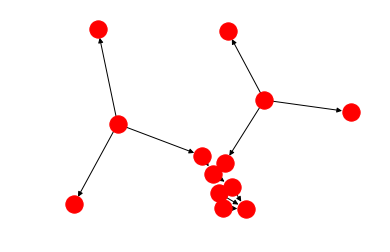

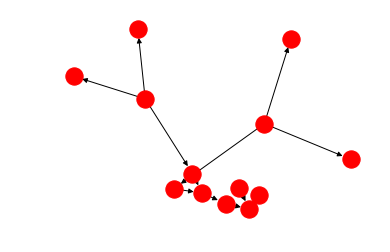

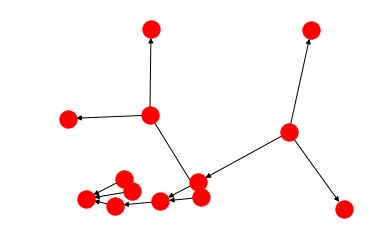

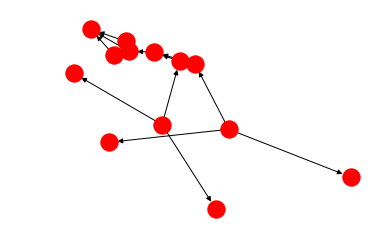

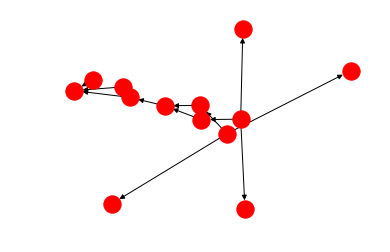

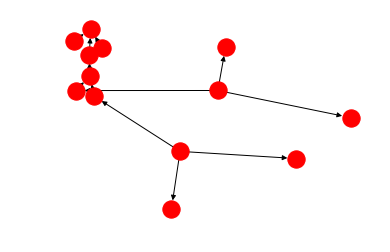

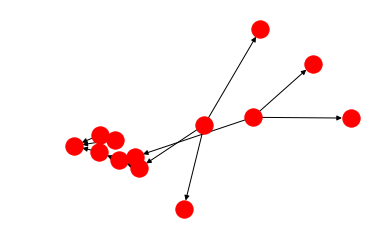

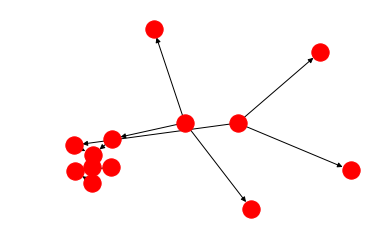

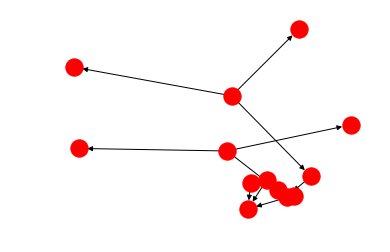

In [22]:
rule1.view()
rule2.view()
rule3.view()
rule4.view()
rule5.view()
rule6.view()
rule7.view()
rule8.view()
rule9.view()

In [23]:
pengisian_ctrl= ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

### Menggunakan mode simulasi

In [24]:
pengisian = ctrl.ControlSystemSimulation(pengisian_ctrl)

### Simulasi dengan memasukan nilai pada variabel input

In [25]:
pengisian.input['tinggi air'] = 5
pengisian.input['air kran'] = 80

## Melakukan perhitungan defuzzifikasi

In [26]:
pengisian.compute()

## Mencetak hasil output defuzzifikasi

Proses komputasi pun dilakukan berdasarkan input yang telah dimasukkan

Berdasarkan hasil komputasi, maka nilai untuk output pengisian adalah

In [27]:
prediksi_akhir = pengisian.compute()
prediksi_akhir = pengisian.output['tingkat pengisian']
print ("Perhitungan hasil komputasi = %.3f" % prediksi_akhir)
print(pengisian.output['tingkat pengisian'])

Perhitungan hasil komputasi = 162.996
162.99587912087938


In [28]:
z = 162.99587912087938
akurasi = prediksi_akhir*100/z
error = 100-akurasi
print ("Akurasi = %.3f" % akurasi + " %")
print ("Error = %.3f" % error  + " %")

Akurasi = 100.000 %
Error = 0.000 %


## Melakukan plotting fungsi keangggotaan setelah dimasukkan input nilai**

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


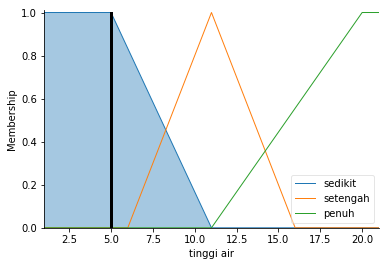

In [29]:
tinggi.view(sim=pengisian)

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


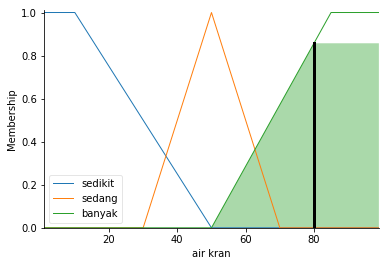

In [30]:
kran.view(sim=pengisian)

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


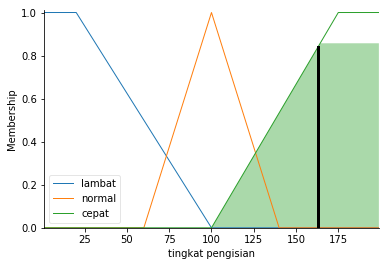

In [31]:
kecepatan.view(sim=pengisian)

## Perhitungan Manual
Karena di atas kita sudah melakukan proses fuzzyfikasi, selanjutnya kita akan cocokkan dengan perhitungan manualnya. Sebagai contoh, input untuk variabel tinggi air bernilai 5, sedangkan untuk variabel air kran bernilai 80. Jika dilihat pada himpunan fuzzy, nilai 5 pada variabel tinggi air berada di himpunan fuzzy **sedikit**, sedangkan untuk nilai 80 pada variabel kelembapan udara berada di himpunan **banyak**.
Berikut adalah perhitungan manualnya:

\begin{equation}
TINGGI\, AIR (sedikit)\\
\mu sedikit [5] = (11-5)/(11-5)=6/6=1\\
AIR\, KERAN (banyak)\\
\mu banyak [80] = (80-50)/(85-50)=30/30=0,85\\
EVALUASI\, RULE\\
Rule 3 : Sedikit-Banyak=Cepat\\
Implikasi : Sedikit-Banyak(1,0,85) min : 0,85\\
0,85 = x-100/175-100\\
0,85x5 = x-100 = 63,75+100 =163,75\\
\end{equation}

## Menentukan Nilai X
$  X1 =
\left\{
     \begin{array}{ll}
       100 + \frac{2}{3} (163,75-100)
    \end{array}
\right.$

$  X1 =
\left\{
    \begin{array}{ll}
       100 + \frac{2}{3} (63,75)
    \end{array}
\right.$

$X1 = 142,5$

-------------------------------------------------------------------------------------------------------------------------

$  X2 =                                    
\left\{
    \begin{array}{ll}
      { \frac{1}{2} (163,75+200)}
    \end{array}
\right.$




$X2 = 181,875$

## Menentukan Nilai A
$  A1 =                                    
\left\{
    \begin{array}{ll}
      { \frac{1}{2} (a x t)}
    \end{array}
\right.$

$  A1 =
\left\{
    \begin{array}{ll}
      {\frac{1}{2} (163,75 - 100 x 0,85)}
    \end{array}
\right.$

$A1 = 27,093$

-------------------------------------------------------------------------------------------------------------------------

                                   
$  A2 =
\left\{
    \begin{array}{ll}
      {(200 - 163,75) x 0,85)}
    \end{array}
\right.$

$A1 = 2$



$  Hasil=
\left\{
    \begin{array}{ll}
      { \sum_{i}^{n}Xi.Ai \over \sum_{i}^{n}Ai} 
    \end{array}
\right.$ 

-------------------------------------------------------------------------------------------------------------------------

$  Hasil=
\left\{
    \begin{array}{ll}
      { (X1xA1)+(X2xA2)\over A1+A2} 
    \end{array}
\right.$ 

-------------------------------------------------------------------------------------------------------------------------

$  Hasil=
\left\{
    \begin{array}{ll}
      { (142,5x27,093)+(181,875x30,8125)+(87.5x9.375)\over 27,093+30,8125} 
    \end{array}
\right.$ 

-------------------------------------------------------------------------------------------------------------------------

$  Hasil=
\left\{
    \begin{array}{ll}
      { (3860,7525+5604)+(5604,0234)\over 57,9055} 
    \end{array}
\right.$ 

-------------------------------------------------------------------------------------------------------------------------

$  Hasil=163,45210556$


Hasil output yang dikeluarkan menggunakan code python sebesar162.996 sedangkan perhitungan manual sebesar 163,45210556
Terdapat perbedaan sebesar 0,45610559